In [ ]:
!pip install fastai2

In [9]:
from fastai2.basics import *

In [11]:
n=100

In [12]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.7188,  1.0000],
        [ 0.5300,  1.0000],
        [-0.6495,  1.0000],
        [ 0.2969,  1.0000],
        [ 0.4332,  1.0000]])

In [13]:
a = tensor(3.,2); a

tensor([3., 2.])

In [14]:
y = x@a + 0.25*torch.randn(n)

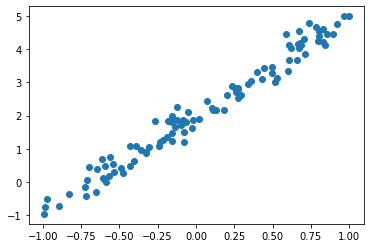

In [15]:
plt.scatter(x[:,0], y);

In [16]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [17]:
a = tensor(-1.,1)

In [18]:
y_hat = x@a
mse(y_hat, y)

tensor(6.1612)

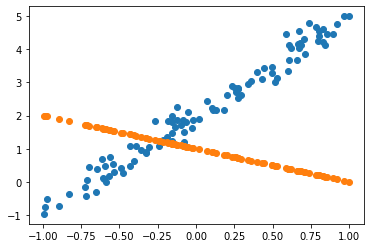

In [19]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [22]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [23]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [30]:
lr = 1e-1
for t in range(1000): update()
a

tensor(0.1862, grad_fn=<MeanBackward0>)
tensor(0.1055, grad_fn=<MeanBackward0>)
tensor(0.0815, grad_fn=<MeanBackward0>)
tensor(0.0744, grad_fn=<MeanBackward0>)
tensor(0.0722, grad_fn=<MeanBackward0>)
tensor(0.0716, grad_fn=<MeanBackward0>)
tensor(0.0714, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)
tensor(0.0713, grad_fn=<MeanBackward0>)


Parameter containing:
tensor([2.9395, 2.0145], requires_grad=True)

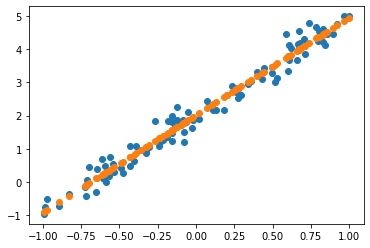

In [31]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

In [33]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [34]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)